In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('train_timeseries.csv')
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


## Feature Engineering

In [19]:
# Checking for value counts of the fips column
val = df['fips'].value_counts()
sorted_val = val.sort_values(ascending=False)
sorted_val

fips
1001     6210
1095     6210
1047     6210
1023     6210
1005     6210
         ... 
56031    6210
56033    6210
56035    6210
56037    6210
56043    6210
Name: count, Length: 3108, dtype: int64

In [20]:
df.shape

(19300680, 21)

The `fips` column encompasses the comprehensive list of United States FIPS codes, categorizing counties. Due to the very large nature of the dataset, we have decided to reduce the scope of our project focusing on a single state to develop the model. By concentrating on one state initially, we streamline our model development process and tailor it to the unique characteristics of that specific region. However, our preprocessing approach can be seamlessly extended to other counties, allowing us to employ a consistent time series modeling strategy.

We have decided to use Carlifornia since it is one of the driest states.

In [30]:
df = df[(df['fips'] >= 6000) & (df['fips'] <7000)]
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
974970,6001,2000-01-01,0.12,99.77,5.97,7.89,6.28,6.28,10.21,5.88,...,7.72,3.01,5.03,0.46,4.57,4.55,8.58,0.76,7.82,NaN
974971,6001,2000-01-02,0.00,100.53,4.46,6.04,2.01,2.04,12.50,0.92,...,6.06,3.13,4.61,2.00,2.61,4.82,6.20,2.71,3.49,NaN
974972,6001,2000-01-03,0.10,100.92,4.85,7.73,3.39,3.40,15.06,3.06,...,7.67,2.42,3.43,1.36,2.07,3.39,4.74,2.15,2.59,NaN
974973,6001,2000-01-04,0.27,100.90,6.11,8.36,6.77,6.77,14.18,5.66,...,8.24,1.92,2.84,1.15,1.69,2.96,5.17,1.30,3.87,0.6079
974974,6001,2000-01-05,0.00,100.52,4.13,7.32,0.75,0.81,14.78,2.24,...,7.13,4.56,7.48,2.70,4.79,6.94,9.41,4.66,4.75,NaN


In [31]:
df.shape

(360180, 21)

In [32]:
# Checking for null values
df.isna().sum()

fips                0
date                0
PRECTOT             0
PS                  0
QV2M                0
T2M                 0
T2MDEW              0
T2MWET              0
T2M_MAX             0
T2M_MIN             0
T2M_RANGE           0
TS                  0
WS10M               0
WS10M_MAX           0
WS10M_MIN           0
WS10M_RANGE         0
WS50M               0
WS50M_MAX           0
WS50M_MIN           0
WS50M_RANGE         0
score          308734
dtype: int64

From the output above it is clear that there are alot of missing values in the `score` column(target variable). However, from the data description it has been pointed out that the missing values actually indicate that there is no drought therefore we will replace the null values with -1 indicating no drought.

In [33]:
df.fillna(-1, inplace=True)
df.isna().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [34]:
df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000,360180.000000
mean,6058.000000,1.630118,94.041645,5.776643,14.172577,3.969181,4.020961,21.164128,8.428128,12.735990,14.138935,2.831597,4.438178,1.358910,3.079279,4.072462,6.175196,2.008002,4.167189,-0.642535
std,33.481385,5.471542,6.032074,1.909490,7.991605,5.609494,5.535478,9.749066,6.679472,4.909369,8.674771,1.302599,1.828328,1.111138,1.348245,1.717543,2.146969,1.647052,1.601500,1.064865
min,6001.000000,0.000000,72.920000,0.620000,-18.310000,-23.100000,-21.630000,-13.800000,-25.010000,0.200000,-24.660000,0.350000,0.710000,0.000000,0.200000,0.500000,1.070000,0.000000,0.320000,-1.000000
25%,6029.000000,0.000000,91.170000,4.380000,8.610000,0.400000,0.450000,13.860000,4.030000,9.250000,7.980000,1.930000,3.100000,0.520000,2.110000,2.840000,4.680000,0.720000,3.040000,-1.000000
50%,6058.000000,0.010000,95.800000,5.760000,13.670000,4.750000,4.770000,20.390000,8.660000,12.930000,13.450000,2.510000,4.100000,1.080000,2.860000,3.720000,5.840000,1.570000,3.960000,-1.000000
75%,6087.000000,0.290000,98.920000,7.110000,20.090000,8.190000,8.200000,28.810000,12.950000,16.420000,20.520000,3.440000,5.400000,1.920000,3.790000,4.930000,7.290000,2.890000,5.030000,-1.000000
max,6115.000000,127.600000,103.240000,17.940000,41.390000,23.010000,23.010000,49.910000,33.800000,29.350000,43.850000,15.310000,20.060000,13.280000,15.490000,18.210000,24.550000,15.720000,19.490000,5.000000


In [35]:
# Calculating the kurtosis of each numeric column
numeric_columns = df.select_dtypes(include=[np.number])
def calculate_kurtosis(column):
    return column.kurtosis()

kurtosis_info = numeric_columns.apply(calculate_kurtosis)
kurtosis_info

fips           -1.200714
PRECTOT        50.611591
PS              0.281571
QV2M           -0.064269
T2M            -0.353966
T2MDEW          0.109689
T2MWET          0.004139
T2M_MAX        -0.680213
T2M_MIN         0.176878
T2M_RANGE      -0.537164
TS             -0.332147
WS10M           4.393049
WS10M_MAX       2.532799
WS10M_MIN       5.681234
WS10M_RANGE     2.920223
WS50M           2.809961
WS50M_MAX       2.964209
WS50M_MIN       2.494351
WS50M_RANGE     2.726705
score          11.951129
dtype: float64

Some columns have very high kurtosis values. This indicates prescence of alot of outliers. Outliers will be handled by scaling the data using the `StandardScaler` which converts the features into a normal/Gaussian distribution.

The `date` column doesn't really contribute to the machine learning model on its current form. We will therefore explode it into a more appropriate format.

In [36]:
# Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360180 entries, 974970 to 1335149
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         360180 non-null  int64  
 1   date         360180 non-null  object 
 2   PRECTOT      360180 non-null  float64
 3   PS           360180 non-null  float64
 4   QV2M         360180 non-null  float64
 5   T2M          360180 non-null  float64
 6   T2MDEW       360180 non-null  float64
 7   T2MWET       360180 non-null  float64
 8   T2M_MAX      360180 non-null  float64
 9   T2M_MIN      360180 non-null  float64
 10  T2M_RANGE    360180 non-null  float64
 11  TS           360180 non-null  float64
 12  WS10M        360180 non-null  float64
 13  WS10M_MAX    360180 non-null  float64
 14  WS10M_MIN    360180 non-null  float64
 15  WS10M_RANGE  360180 non-null  float64
 16  WS50M        360180 non-null  float64
 17  WS50M_MAX    360180 non-null  float64
 18  WS50M_MIN    360180 non

In order to appropriately convert the `date` column we first have to change its data type into a datetime format.

In [37]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df['date'].dtype)

datetime64[ns]


In [38]:
# Exploding the date column to year month and date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
974970,6001,2000-01-01,0.12,99.77,5.97,7.89,6.28,6.28,10.21,5.88,...,0.46,4.57,4.55,8.58,0.76,7.82,-1.0000,2000,1,1
974971,6001,2000-01-02,0.00,100.53,4.46,6.04,2.01,2.04,12.50,0.92,...,2.00,2.61,4.82,6.20,2.71,3.49,-1.0000,2000,1,2
974972,6001,2000-01-03,0.10,100.92,4.85,7.73,3.39,3.40,15.06,3.06,...,1.36,2.07,3.39,4.74,2.15,2.59,-1.0000,2000,1,3
974973,6001,2000-01-04,0.27,100.90,6.11,8.36,6.77,6.77,14.18,5.66,...,1.15,1.69,2.96,5.17,1.30,3.87,0.6079,2000,1,4
974974,6001,2000-01-05,0.00,100.52,4.13,7.32,0.75,0.81,14.78,2.24,...,2.70,4.79,6.94,9.41,4.66,4.75,-1.0000,2000,1,5


With the date column exploded, we can drop the `date` column. We can also drop the `fips` column since its just an area indicator.

In [39]:
df.drop(columns=['fips', 'date'], inplace=True)
df.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
974970,0.12,99.77,5.97,7.89,6.28,6.28,10.21,5.88,4.34,7.72,...,0.46,4.57,4.55,8.58,0.76,7.82,-1.0000,2000,1,1
974971,0.00,100.53,4.46,6.04,2.01,2.04,12.50,0.92,11.58,6.06,...,2.00,2.61,4.82,6.20,2.71,3.49,-1.0000,2000,1,2
974972,0.10,100.92,4.85,7.73,3.39,3.40,15.06,3.06,12.00,7.67,...,1.36,2.07,3.39,4.74,2.15,2.59,-1.0000,2000,1,3
974973,0.27,100.90,6.11,8.36,6.77,6.77,14.18,5.66,8.52,8.24,...,1.15,1.69,2.96,5.17,1.30,3.87,0.6079,2000,1,4
974974,0.00,100.52,4.13,7.32,0.75,0.81,14.78,2.24,12.54,7.13,...,2.70,4.79,6.94,9.41,4.66,4.75,-1.0000,2000,1,5


In [40]:
df['score'].value_counts()

score
-1.0000    308734
 0.0000     18038
 1.0000      2753
 2.0000      2607
 3.0000      2576
            ...  
 0.2097         1
 1.3849         1
 1.4116         1
 1.4739         1
 2.1628         1
Name: count, Length: 7514, dtype: int64

From the output above we see that there are score values that are not whole numbers. For the purpose of consistency with drought score category, we will round off to the nearest whole number.

In [41]:
df['score'] = df['score'].round()
df.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
974970,0.12,99.77,5.97,7.89,6.28,6.28,10.21,5.88,4.34,7.72,...,0.46,4.57,4.55,8.58,0.76,7.82,-1.0,2000,1,1
974971,0.00,100.53,4.46,6.04,2.01,2.04,12.50,0.92,11.58,6.06,...,2.00,2.61,4.82,6.20,2.71,3.49,-1.0,2000,1,2
974972,0.10,100.92,4.85,7.73,3.39,3.40,15.06,3.06,12.00,7.67,...,1.36,2.07,3.39,4.74,2.15,2.59,-1.0,2000,1,3
974973,0.27,100.90,6.11,8.36,6.77,6.77,14.18,5.66,8.52,8.24,...,1.15,1.69,2.96,5.17,1.30,3.87,1.0,2000,1,4
974974,0.00,100.52,4.13,7.32,0.75,0.81,14.78,2.24,12.54,7.13,...,2.70,4.79,6.94,9.41,4.66,4.75,-1.0,2000,1,5


In [42]:
# Checking the correlation between the features and target variable
df.corr()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
PRECTOT,1.000000,-0.037689,0.082070,-0.246080,0.081889,0.080482,-0.324281,-0.164524,-0.420116,-0.230739,...,0.189584,0.206797,0.349739,0.369170,0.271671,0.215506,-0.014443,-1.318282e-02,-2.834663e-02,1.049142e-02
PS,-0.037689,1.000000,0.423672,0.281487,0.564759,0.568150,0.219885,0.369501,-0.066079,0.294795,...,0.219946,-0.001060,0.135614,0.136334,0.153315,0.025096,-0.010322,-8.110779e-06,-3.948723e-03,-6.926623e-04
QV2M,0.082070,0.423672,1.000000,0.422368,0.968497,0.969844,0.306339,0.538799,-0.124737,0.453576,...,0.135005,0.045210,0.035597,0.027719,0.079069,-0.044153,-0.010621,1.207338e-02,8.414239e-03,3.632728e-03
T2M,-0.246080,0.281487,0.422368,1.000000,0.426386,0.430959,0.975348,0.960776,0.629662,0.990562,...,-0.087352,0.123168,-0.142865,-0.060945,-0.179131,0.102530,0.024283,2.318783e-02,1.979361e-01,1.158866e-02
T2MDEW,0.081889,0.564759,0.968497,0.426386,1.000000,0.999866,0.309713,0.545772,-0.127523,0.458537,...,0.158169,0.034059,0.057022,0.050967,0.099203,-0.033695,-0.013298,6.541381e-03,-1.527861e-02,3.249669e-03
T2MWET,0.080482,0.568150,0.969844,0.430959,0.999866,1.000000,0.314162,0.550484,-0.125102,0.462869,...,0.158927,0.035338,0.057381,0.051497,0.099361,-0.033147,-0.013274,6.677637e-03,-1.348782e-02,3.028375e-03
T2M_MAX,-0.324281,0.219885,0.306339,0.975348,0.309713,0.314162,1.000000,0.887286,0.778604,0.963084,...,-0.126723,0.095905,-0.182927,-0.095951,-0.219010,0.096616,0.025331,2.139198e-02,2.015468e-01,1.003773e-02
T2M_MIN,-0.164524,0.369501,0.538799,0.960776,0.545772,0.550484,0.887286,1.000000,0.401423,0.952656,...,-0.029379,0.131462,-0.095168,-0.029939,-0.119532,0.082803,0.023360,2.810477e-02,2.143634e-01,1.069573e-02
T2M_RANGE,-0.420116,-0.066079,-0.124737,0.629662,-0.127523,-0.125102,0.778604,0.401423,1.000000,0.616356,...,-0.211676,0.011584,-0.233778,-0.149810,-0.272282,0.079198,0.018522,4.240930e-03,1.085828e-01,5.377433e-03
TS,-0.230739,0.294795,0.453576,0.990562,0.458537,0.462869,0.963084,0.952656,0.616356,1.000000,...,-0.035703,0.157098,-0.094808,-0.016035,-0.132305,0.114578,0.023374,1.931935e-02,1.855556e-01,1.160875e-02


From the correlation table we can the see that the correlation between the `score` and the wind speed at 50 meters `WS50M` is very low. This means that feature will have a very low contribution to the machine learning model hence it is dropped.

In [43]:
df.drop(columns=['WS50M'], inplace=True)
df.head()

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
974970,0.12,99.77,5.97,7.89,6.28,6.28,10.21,5.88,4.34,7.72,...,5.03,0.46,4.57,8.58,0.76,7.82,-1.0,2000,1,1
974971,0.00,100.53,4.46,6.04,2.01,2.04,12.50,0.92,11.58,6.06,...,4.61,2.00,2.61,6.20,2.71,3.49,-1.0,2000,1,2
974972,0.10,100.92,4.85,7.73,3.39,3.40,15.06,3.06,12.00,7.67,...,3.43,1.36,2.07,4.74,2.15,2.59,-1.0,2000,1,3
974973,0.27,100.90,6.11,8.36,6.77,6.77,14.18,5.66,8.52,8.24,...,2.84,1.15,1.69,5.17,1.30,3.87,1.0,2000,1,4
974974,0.00,100.52,4.13,7.32,0.75,0.81,14.78,2.24,12.54,7.13,...,7.48,2.70,4.79,9.41,4.66,4.75,-1.0,2000,1,5


<Axes: xlabel='score'>

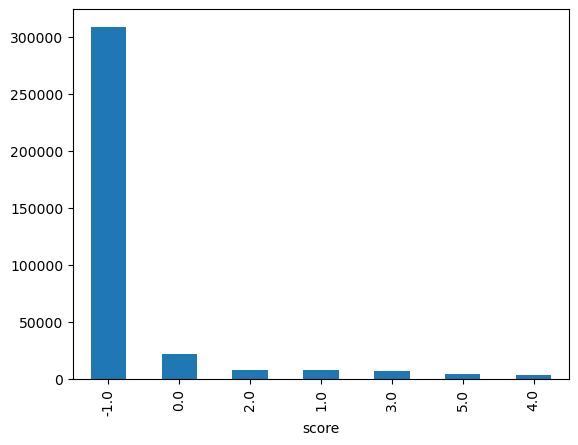

In [44]:
# Checking the balance of classes
df['score'].value_counts().plot(kind='bar')

From the visualization above, it can be seen that the classes are heavily imbalanced. We therefore have to keep this in mind as we are training our machine learning model.

## Machine Learning Model

For the machine learning model we will use a classification algorithm to predict the drought `score`. The algorithm in this case will be a `Random Forest` Classifier. This is used due to its high accuracy especially when dealing with large datasets and its tendency of not overfitting. The main evaluation metrics used will be `precision` and `recall` which will be indicated in the `classification report`. Before the training of the model begins, it first has to be split and scaled.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [46]:
# Separating features from the target
X = df.drop(columns=['score'])
y = df['score']
print(X.shape)
print(y.shape)

(360180, 20)
(360180,)


In [47]:
# Splitting the data into test and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

When scaling for machine learning models, it's essential to fit the scaler only on the training data and then use the same fitted scaler to transform both the training and testing data. This approach ensures that the scaling is consistent between the training and testing datasets.

In [48]:
# Scaling the data to deal with outliers
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

From the `RandomForestClassifier` instantiation, one of the parameters is the `class_weight`. We have set it to balanced  to automatically adjust the class weights inversely proportional to class frequencies. This will make the model pay more attention to minority classes during training hence dealing with the class imbalance.

In [50]:
# Generating predictions
y_pred = clf.predict(X_test)
y_pred

array([-1., -1., -1., ..., -1., -1., -1.])

### Model Evaluation

In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

        -1.0       0.88      1.00      0.94     77253
         0.0       0.98      0.17      0.28      5407
         1.0       0.89      0.14      0.25      2005
         2.0       0.87      0.15      0.26      1962
         3.0       0.86      0.12      0.21      1609
         4.0       0.94      0.15      0.26       876
         5.0       0.97      0.16      0.27       933

    accuracy                           0.88     90045
   macro avg       0.91      0.27      0.35     90045
weighted avg       0.89      0.88      0.84     90045



The `precision` of the individual classes are high indicating that the model has a low false positive rate and makes few incorrect positive predictions.

The `recall` on the other hand is only high for the no drought category, that is the -1, and very low on the other classes. This is, however, expected as the dataset had imbalanced class distribution as discussed earlier. This is further reinforced with the low `recall` on the `macro avg` but high in the `weighted avg`. This is because it provides an average that considers class imbalances by giving more weight to classes with larger support making it useful when you want to assess the overall performance of the model while taking class imbalances into account.

The `accuracy` isn't considered as much as it can be a misleading metric when dealing with imbalanced classes.

### Feature Importances

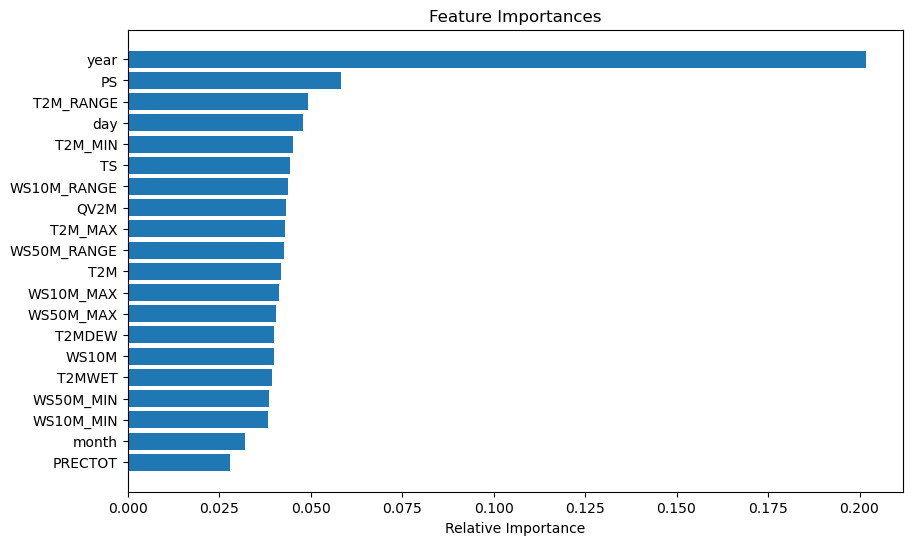

In [57]:
import matplotlib.pyplot as plt
features = [i.split("__")[0] for i in X.columns]
importances = clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The Feature Importance visualization tells us that the year was very important in predicting the drought score.